## Introduction to data visualization with Matplotlib

In [94]:
#Libraries
import matplotlib.pyplot as plt
import pandas as pd

Here we create a figure with empty axes (axes if everything that we see on the figure)

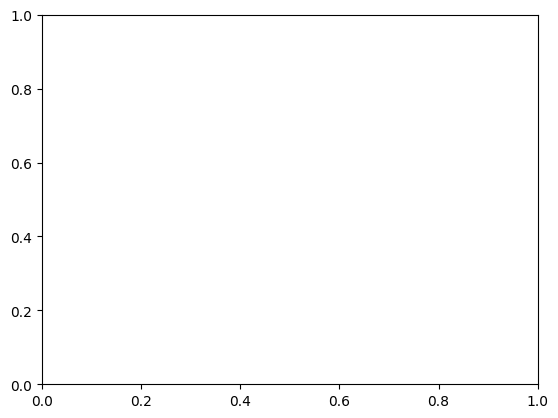

In [95]:
fig, ax = plt.subplots()
plt.show()

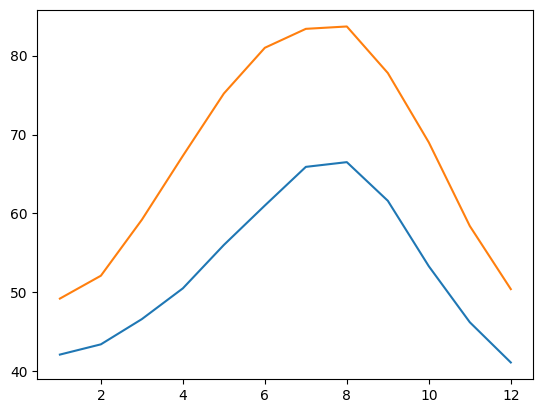

In [96]:
import pandas as pd

austin_weather = pd.read_csv("databases/austin_weather.csv")
seattle_weather = pd.read_csv("databases/seattle_weather.csv")

fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### Customization

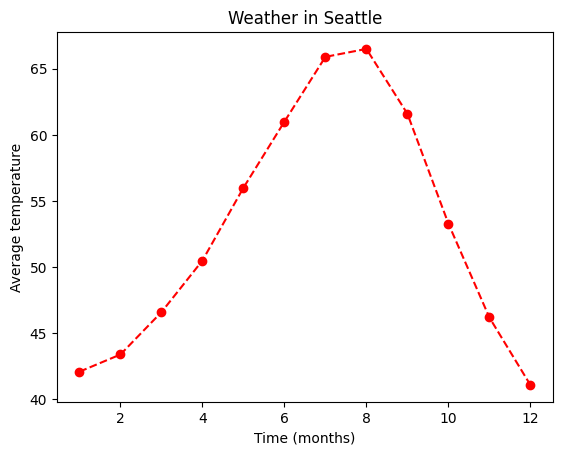

In [97]:
fig, ax = plt.subplots()

ax.plot(seattle_weather["DATE"],
        seattle_weather["MLY-TAVG-NORMAL"],
        marker="o",
        linestyle="--",
        color="r")
        #marker="v"
        #linestyle="None"

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature")
ax.set_title("Weather in Seattle")
plt.show()

### Small multiples (overcoming too many data)

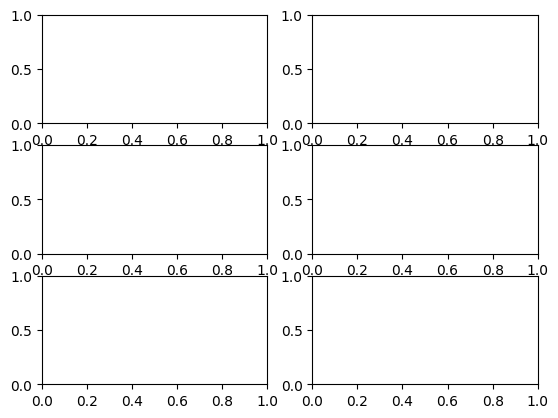

In [98]:
fig, ax = plt.subplots(3, 2) 
#creates a figure object with 3 rows of subplots and 2 columns
plt.show()

In [99]:
ax.shape

(3, 2)

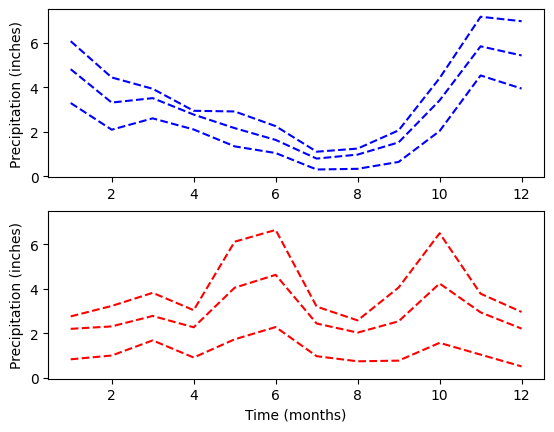

In [100]:
fig, ax = plt.subplots(2, 1, sharey=True) #all subplots have the same range of y-axis

ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"],
           color="b", linestyle="--")
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-25PCTL"],
           color="b", linestyle="--")
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-75PCTL"],
           color="b", linestyle="--")

ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"],
           color="r", linestyle="--")
ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-25PCTL"],
           color="r", linestyle="--")
ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-75PCTL"],
           color="r", linestyle="--")

ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")

ax[1].set_xlabel("Time (months)")
plt.show()

To access column we should use: ```ax[0, 0].plot(...)```

### Plotting Time-series data

In [101]:
climate_change = pd.read_csv("databases/climate_change.csv",
                            parse_dates=["date"],
                            index_col="date")

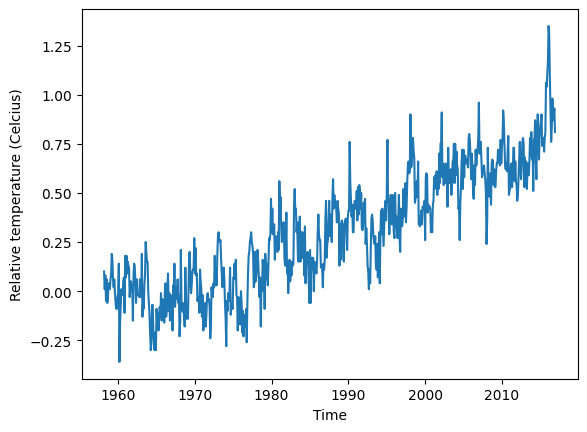

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

ax.set_xlabel("Time")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

### Plotting time-series with different variables (having variables with different scales)

We have already seen how to plot such variables in different subplots, now we will see how to do it in the same subplot using two different y-axis scales

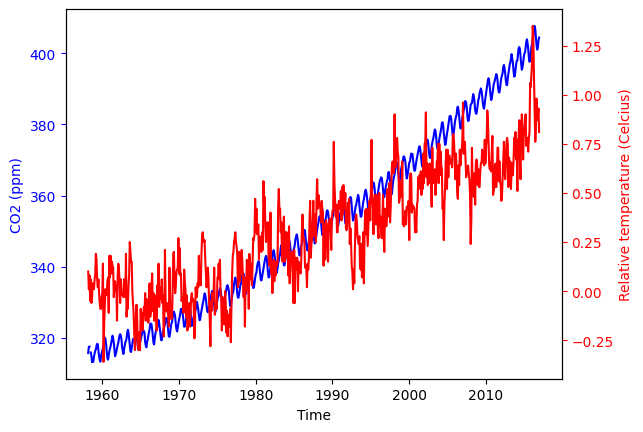

In [103]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color="b")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)", color="b")
ax.tick_params("y", colors="b")

ax2 = ax.twinx() #share the same x-axis, but the y-axis are separate 
ax2.plot(climate_change.index, climate_change["relative_temp"], color="r")
ax2.set_ylabel("Relative temperature (Celcius)", color="r")
ax2.tick_params("y", colors="r") #!colorS!
plt.show()

Let's implement a function to use this code in the future

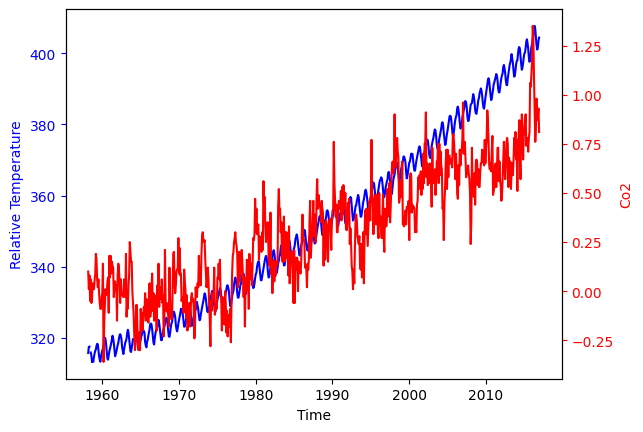

In [105]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params("y", colors=color) #!colorS!

fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change["co2"],
                "b", "Time", "Relative Temperature",)

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"],
                "r", "Time", "Co2")
plt.show()

### Annotating time-series data